In [1]:

import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, time, warnings
from datetime import datetime #DB
import pandas as pd

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.backend               import set_session
from tensorflow.keras                       import backend #, models
from tensorflow.keras.models                import load_model
from tensorflow.keras.utils                 import plot_model #DB

import gc #DB
from config import fcn_config as cfg
from config import fcn8_cnn as cnn

warnings.filterwarnings("ignore")
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.85
config.gpu_options.visible_device_list = "0"
set_session(tf.compat.v1.Session(config=config))


fcn_config.py runs from  /workspace/Vitis-AI-Tutorials-2.5/Tutorials/Keras_FCN8_UNET_segmentation/files/code


In [2]:

HEIGHT = cfg.HEIGHT
WIDTH  = cfg.WIDTH
N_CLASSES = cfg.NUM_CLASSES
EPOCHS = cfg.EPOCHS
UPSCALE=False

dir_data = cfg.DATASET_DIR
dir_train_img = cfg.dir_train_img
dir_train_seg = cfg.dir_train_seg
dir_test_img  = cfg.dir_test_img
dir_test_seg  = cfg.dir_test_seg
dir_calib_img = cfg.dir_calib_img
dir_calib_seg = cfg.dir_calib_seg
dir_valid_img = cfg.dir_valid_img
dir_valid_seg = cfg.dir_valid_seg

######################################################################
# model
######################################################################

#model = UNET((HEIGHT, WIDTH, 3))

model = cnn.FCN8(nClasses     = N_CLASSES,
             input_height = HEIGHT,
             input_width  = WIDTH,
                 upscale = UPSCALE)





Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
image= cv2.imread("received_image.jpg",1)

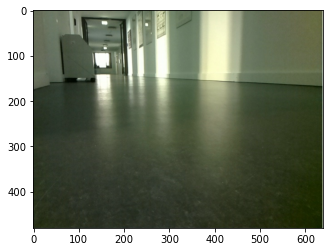

In [4]:
plt.imshow(image)

In [14]:
model_filename= model_filename= "../keras_model/fcn8ups/ep"    + str(300) + "_trained_fcn8ups_"    + str(WIDTH) + "x" + str(HEIGHT) + ".hdf5"

model = load_model(model_filename)

In [15]:
img = cv2.resize(image, (cfg.WIDTH, cfg.HEIGHT))
img = img.astype(np.float32)
img = img/cfg.NORM_FACTOR - 1.0
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
norm_test_img=np.array(img)
norm_test_img = np.reshape(norm_test_img, (1, 224, 224, 3))

In [16]:
y_pred1   = model.predict(norm_test_img)

In [17]:
y_pred1_i = np.argmax(y_pred1, axis=3)
y_pred1_i=np.reshape(y_pred1_i,(224,224))

In [18]:
y_pred1_i.shape

(224, 224)

In [19]:
def give_color_to_seg_img(seg,n_classes):
    if len(seg.shape)==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    #colors = sns.color_palette("hls", n_classes) #DB
    colors = cfg.COLORS #DB
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0]))
        seg_img[:,:,1] += (segc*( colors[c][1]))
        seg_img[:,:,2] += (segc*( colors[c][2]))

    return(seg_img)


In [20]:
final_img=give_color_to_seg_img(y_pred1_i,5)
cv2.imwrite("process_res.jpg",final_img)

True